In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

## Theory

- **Definition 50.1 (Mean Function)**: Let mean function of a random process $\{X(t)\}$ be $\mu_X(t)$. This specifies the expected value for the random process at time $t$
    - $\mu_X(t) = E[X(t)]$ for continuous time process
    - $\mu_X[n] = E[X[n]]$ for discrete time process

- Think of $E[X(t)]$ as the average value of the process at time $t$ across all instantiations



 

## Examples

### Example 50.1 (Random Amplitude Process)

- Consider the random amplitude process $X(t) = A \cos(2 \pi ft)$. We last saw this in example 48.1. Let's suppose $A \sim \text{Binomial}(n=5, p=0.5)$, and $f = 1$. What is the mean function $\mu_X(t)$?

$$\begin{align}
    \mu_X(t) &= E[X(t)] \\
    &= E[A \cos(2 \pi ft)] \\
    &= E[A \cos(2 \pi t)] \\
    &= \cos(2 \pi t) E[A] \\
    &= 2.5 \cdot \cos(2 \pi t)
\end{align}$$

- The last step can be done because, once you fix $t$, $\cos(2 \pi t)$ is a constant. Only $A$ remains a random variable

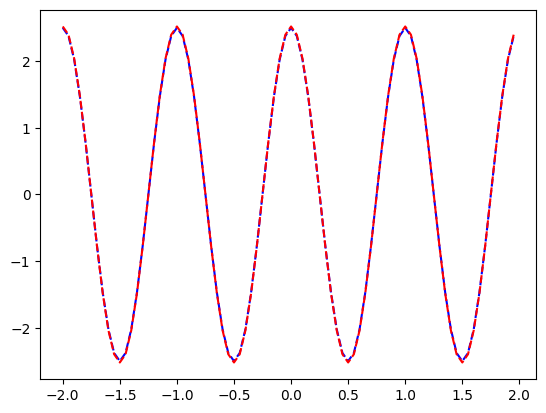

In [29]:
t = np.arange(-2, 2, 0.05)
A = np.random.binomial(n=5, p=0.5, size=10_000)

instantiations = [a * np.cos(2 * np.pi * t) for a in A]
# for inst in instantiations:
#     plt.plot(t, inst, alpha=0.1, color='blue')

computed_mean_func = 2.5 * np.cos(2 * np.pi * t)
simulated_mean_func = np.mean(instantiations, axis=0)

plt.plot(t, computed_mean_func, alpha=1, color='blue', linestyle='--')
plt.plot(t, simulated_mean_func, alpha=1, color='red', linestyle='--')


### Example 50.2 (Poisson Process)

- Consider the Poisson process $\{ N(t); t \ge 0 \}$ of rate $\lambda$, defined in Example 47.1. What is its mean function?

- $N(t)$ represents the number of arrivals on the interval $(0,t)
- We know that this count has distribution $\text{Poisson}(\mu = \lambda t)$. 
- The expected value of a $\text{Poisson}(\lambda)$ random variable is $\mu$ 
- So $\mu_N(t) = E[N(t)] = \lambda t$

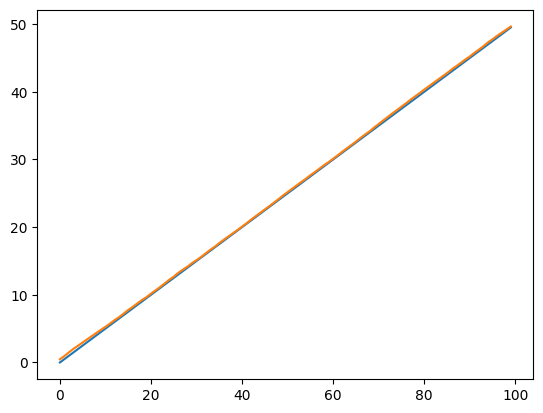

In [36]:
LAM = 0.5
tvals = np.arange(0, 100, 1)
computed_mean_func = LAM * tvals

instantiations = [np.random.poisson(lam=LAM, size=len(tvals)).cumsum() for _ in range(500)]
# for inst in instantiations:
#     plt.plot(tvals, inst, alpha=0.3, color='blue')

simulated_mean_func = np.mean(instantiations, axis=0)

plt.plot(tvals, computed_mean_func)
plt.plot(tvals, simulated_mean_func)
# plt.plot(tvals, instantiations[0])

### Example 50.3 (White Noise)

- Consider the white noise process $\{Z[n]\}$ defined in 47.2, which consists of i.i.d. random variables. Suppose the expected value of these random variables is $\mu = E[Z[n]]$. Then, the mean function is constant, equal to this expected value. $$\mu_Z[n] = E[Z[n]] = \mu$$ What is the mean function $\mu_Z[n]$ when $Z$ is a standard normal random variable?

- $\mu_Z[n] = E[Z[n]] = 0$ by definition of standard normal variable 

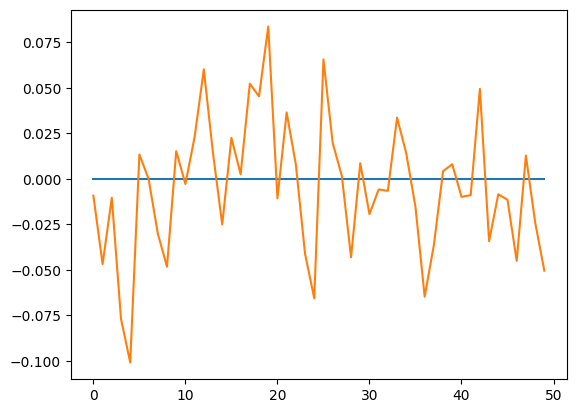

In [43]:
instantiations = [np.random.normal(0, 1, size=50) for _ in range(500)]

computed_mean_func = 0
simulated_mean_func = np.mean(instantiations, axis=0)



plt.plot(np.arange(0, 50, 1), np.repeat(computed_mean_func, 50))
plt.plot(np.arange(0, 50, 1), simulated_mean_func)

### Example 50.4 (Random Walk)

- Consider the random walk process $\{ X[n]; n \ge 0 \}$ of Example 47.3. Since $$ X[n] = X[n-1] + Z[n] = Z[1] + Z[2] + ... Z[n] $$

- So the mean function function $\mu_{X[n]} = E[X[n]] = E[Z[1]] + E[Z[2]] + ... E[Z[n]] = n \cdot E[Z[1]]$

- If $Z[i]$ is drawn from an IID standard normal dstribution, then $Z[i]$ are all 0, so $\mu_{X[n]}$ is also 0